## Plotting very large datasets meaningfully, using `datashader`

There are a variety of approaches for plotting large datasets, but most of them are very unsatisfactory. Here we first show some of the issues, then demonstrate how the `datashader` library helps make large datasets truly practical.  

We'll use part of the well-studied [NYC Taxi trip database](http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml), with the locations of all NYC taxi pickups and dropoffs from the month of January 2015.  Although we know what the data is, let's approach it as if we are doing data mining, and see what it takes to understand the dataset from scratch.

**NOTE:**  This dataset is also explorable through the Datashader example dashboard. From inside the examples directory, run: `DS_DATASET=nyc_taxi panel serve --show dashboard.ipynb`

### Load NYC Taxi data 

(takes 10-20 seconds, since it's in the inefficient but widely supported CSV file format...)

In [1]:
import pandas as pd
%time df = pd.read_csv('./data/nyc_taxi.csv',usecols= \
                       ['pickup_x', 'pickup_y', 'dropoff_x','dropoff_y', 'passenger_count','tpep_pickup_datetime'])
df.tail()

CPU times: user 18.3 s, sys: 1.34 s, total: 19.7 s
Wall time: 19.7 s


tpep_pickup_datetime  passenger_count      pickup_x      pickup_y  \
10679302  2015-01-10 19:01:44                2 -8.232298e+06  4.980860e+06   
10679303  2015-01-10 19:01:44                2 -8.235721e+06  4.972331e+06   
10679304  2015-01-10 19:01:44                1 -8.235341e+06  4.975470e+06   
10679305  2015-01-10 19:01:44                1 -8.237594e+06  4.973844e+06   
10679306  2015-01-10 19:01:45                1 -8.233229e+06  4.977946e+06   

             dropoff_x     dropoff_y  
10679302 -8.232492e+06  4.979234e+06  
10679303 -8.234857e+06  4.971131e+06  
10679304 -8.234203e+06  4.981092e+06  
10679305 -8.235618e+06  4.973722e+06  
10679306 -8.234152e+06  4.977120e+06

As you can see, this file contains about 12 million pickup and dropoff locations (in Web Mercator coordinates), with passenger counts.

### 1000-point scatterplot: undersampling

Any plotting program should be able to handle a plot of 1000 datapoints.  Here the points are initially overplotting each other, but if you hit the Reset button (top right of plot) to zoom in a bit, nearly all of them should be clearly visible in the following Bokeh plot of a random 1000-point sample.  If you know what to look for, you can even see the outline of Manhattan Island and Central Park from the pattern of dots.  We've included geographic map data here to help get you situated, though for a genuine data mining task in an abstract data space you might not have any such landmarks.  In any case, because this plot is discarding 99.99% of the data, it reveals very little of what might be contained in the dataset, a problem called *undersampling*.

from bokeh.tile_providers import STAMEN_TERRAIN

samples = df.sample(n=1000)
p = base_plot()
p.add_tile(STAMEN_TERRAIN)
p.circle(x=samples['dropoff_x'], y=samples['dropoff_y'], **options)
show(p)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
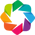

In [2]:
import numpy as np
import holoviews as hv
from holoviews import opts
from holoviews.element.tiles import StamenTerrain
hv.extension('bokeh')

In [3]:
plot_width  = int(750)
plot_height = int(plot_width//1.2)
x_range, y_range =(-8242000,-8210000), (4965000,4990000)
plot_options = hv.Options(width=plot_width, height=plot_height, xaxis=None, yaxis=None)

In [4]:
opts.defaults(
    opts.Points(width=plot_width, height=plot_height, size=5, color='blue'),
    opts.Overlay(width=plot_width, height=plot_height, xaxis=None, yaxis=None),
    opts.RGB(width=plot_width, height=plot_height))

In [5]:
samples = df.sample(n=1000)
tiles = StamenTerrain().redim.range(x=x_range, y=y_range)
points = hv.Points(samples, ['dropoff_x', 'dropoff_y'])
(tiles * points)

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [dropoff_x,dropoff_y]   (tpep_pickup_datetime,passenger_count,pickup_x,pickup_y)

### 10,000-point scatterplot: overplotting

We can of course plot more points to reduce the amount of undersampling.  However, even if we only try to plot 0.1% of the data, ignoring the other 99.9%, we will find major problems with *overplotting*, such that the true density of dropoffs in central Manhattan is impossible to see due to occlusion:

In [6]:
hv.Points(df.sample(n=10000), ['dropoff_x', 'dropoff_y'])

:Points   [dropoff_x,dropoff_y]   (tpep_pickup_datetime,passenger_count,pickup_x,pickup_y)

Overplotting is reduced if you zoom in on a particular region (may need to click to enable the wheel-zoom tool in the upper right of the plot first, then use the scroll wheel).  However, then the problem switches to back to serious undersampling, as the too-sparsely sampled datapoints get revealed for zoomed-in regions, even though much more data is available.

### 100,000-point scatterplot: saturation

If you make the dot size smaller, you can reduce the overplotting that occurs when you try to combat undersampling.  Even so, with enough opaque data points, overplotting will be unavoidable in popular dropoff locations.  So you can then adjust the alpha (opacity) parameter of most plotting programs, so that multiple points need to overlap before full color saturation is achieved.  With enough data, such a plot can approximate the probability density function for dropoffs, showing where dropoffs were most common:

```python
hv.Points(df.sample(n=100000), ['dropoff_x', 'dropoff_y']).opts(size=1, alpha=0.1, xaxis=None, yaxis=None)
```

<img src="../assets/images/nyc_taxi_100k.png">

[*Here we've shown static output as a PNG rather than a live Bokeh plot, to reduce the file size for distributing full notebooks and because some browsers will have trouble with plots this large.  The above cell can be converted into code and executed to get the full interactive plot.*]

However, it's very tricky to set the size and alpha parameters.  How do we know if certain regions are saturating, unable to show peaks in dropoff density? Here we've manually set the alpha to show a clear structure of streets and blocks, as one would intuitively expect to see, but the density of dropoffs still seems approximately the same on nearly all Manhattan streets (just wider in some locations), which is unlikely to be true. We can of course reduce the alpha value to reduce saturation further, but there's no way to tell when it's been set correctly, and it's already low enough that nothing other than Manhattan and La Guardia is showing up at all. Plus, this alpha value will only work even reasonably well at the one zoom level shown. Try zooming in (may need to enable the wheel zoom tool in the upper right) to see that at higher zooms, there is less overlap between dropoff locations, so that the points *all* start to become transparent due to lack of overlap. Yet without setting the size and alpha to a low value in the first place, the stucture is invisible when zoomed out, due to overplotting. Thus even though Bokeh provides rich support for interactively revealing structure by zooming, it is of limited utility for large data; either the data is invisible when zoomed in, or there's no large-scale structure when zoomed out, which is necessary to indicate where zooming would be informative.

Moreover, we're still ignoring 99% of the data.  Many plotting programs will have trouble with plots even this large, but Bokeh can handle 100-200,000 points in most browsers. Here we've enabled Bokeh's WebGL support, which gives smoother zooming behavior, but the non-WebGL mode also works well. Still, for such large sizes the plots become slow due to the large HTML file sizes involved, because each of the data points are encoded as text in the web page, and for even larger samples the browser will fail to render the page at all.  


### 10-million-point datashaded plots: auto-ranging, but limited dynamic range

To let us work with truly large datasets without discarding most of the data, we can take an entirely different approach. Instead of using a Bokeh scatterplot, which encodes every point into JSON and stores it in the HTML file read by the browser, we can use the [datashader](https://github.com/bokeh/datashader) library to render the entire dataset into a pixel buffer in a separate Python process, and then provide a fixed-size image to the browser containing only the data currently visible. This approach decouples the data processing from the visualization.  The data processing is then limited only by the computational power available, while the visualization has much more stringent constraints determined by your display device (a web browser and your particular monitor, in this case). This approach works particularly well when your data is in a far-off server, but it is also useful whenever your dataset is larger than your display device can render easily.

Because the number of points involved is no longer a limiting factor, you can now use the entire dataset (including the full 150 million trips that have been made public, if you download that data separately).  Most importantly, because datashader allows computation on the intermediate stages of plotting, you can easily define operations like auto-ranging (which is on by default), so that we can be sure there is no overplotting or saturation and no need to set parameters like alpha.

The steps involved in datashading are (1) create a Canvas object with the shape of the eventual plot (i.e. having one storage bin for collecting points, per final pixel), (2) aggregating all points into that set of bins, incrementally counting them, and (3) mapping the resulting counts into a visible color from a specified range to make an image:

In [7]:
import datashader as ds
from datashader import transfer_functions as tf
from datashader.colors import Greys9
Greys9_r = list(reversed(Greys9))[:-2]

In [8]:
%%time
cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height, x_range=x_range, y_range=y_range)
agg = cvs.points(df, 'dropoff_x', 'dropoff_y',  ds.count('passenger_count'))
img = tf.shade(agg, cmap=["white", 'darkblue'], how='linear')

CPU times: user 561 ms, sys: 120 ms, total: 681 ms
Wall time: 680 ms


The resulting image is similar to the 100,000-point Bokeh plot above, but (a) makes use of all 12 million datapoints, (b) is computed in only a tiny fraction of the time, (c) does not require any magic-number parameters like size and alpha, and (d) automatically ensures that there is no saturation or overplotting:

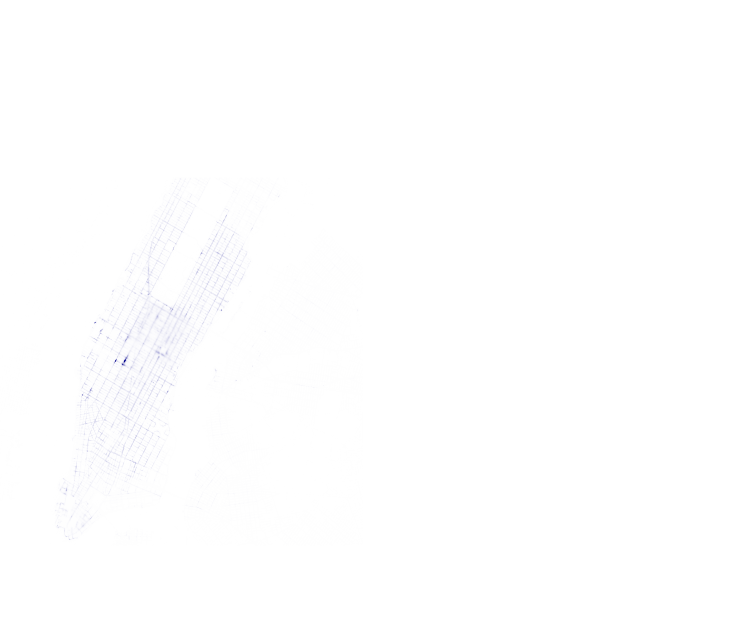

In [9]:
img

This plot renders the count at every pixel as a color from the specified range (here from white to dark blue), mapped linearly. If your display device were linear, and the data were distributed evenly across this color range, then the result of such linear, auto-ranged processing would be an effective, parameter-free way to visualize your dataset.

However, real display devices are not typically linear, and more importantly, real data is rarely distributed evenly.  Here, it is clear that there are "hotspots" in dropoffs, with a very high count for areas around Penn Station and Madison Square Garden, relatively low counts for the rest of Manhattan's streets, and apparently no dropoffs anywhere else but La Guardia airport.  NYC taxis definitely cover a larger geographic range than this, so what is the problem?  To see, let's look at the histogram of counts for the above image:

In [10]:
frequencies,edges = np.histogram(agg.values, bins=100)
hv.Histogram((edges, frequencies)).opts(width=800).redim.range(Frequency=(0,6000))

:Histogram   [x]   (Frequency)

Clearly, most of the pixels have very low counts (under 3000), while a very few pixels have much larger counts (up to 22000, in this case).  When these values are mapped into colors for display, nearly all of the pixels will end up being colored with the lowest colors in the range, i.e. white or nearly white, while the other colors in the available range will be used for only a few dozen pixels at most.  Thus most of the pixels in this plot convey very little information about the data, wasting nearly all of dynamic range available on your display device.  It's thus very likely that we are missing a lot of the structure in this data that we could be seeing.


### 10-million-point datashaded plots: high dynamic range

For the typical case of data that is distributed nonlinearly over the available range, we can use nonlinear scaling to map the data range into the visible color range.  E.g. first transforming the values via a log function will help flatten out this histogram and reveal much more of the structure of this data:

In [11]:
frequencies,edges = np.histogram(np.log1p(agg.values), bins=100)
hv.Histogram((edges, frequencies)).opts(width=800).redim.range(Frequency=(0,8000))

:Histogram   [x]   (Frequency)

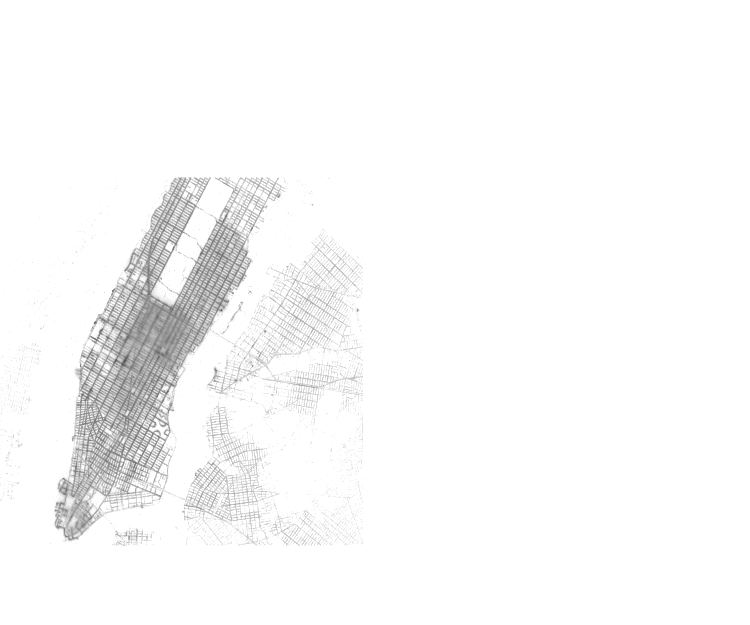

In [12]:
tf.shade(agg, cmap=Greys9_r, how='log')

We can now see that there is rich structure throughout this dataset -- geographic features like streets and buildings are clearly modulating the values in both the high-dropoff regions in Manhattan and the relatively low-dropoff regions in the surrounding areas.  Still, this choice is arbitrary -- why the log function in particular?  It clearly flattened the histogram somewhat, but it was just a guess.  We can instead explicitly equalize the histogram of the data before building the image, making structure visible at every data level (and thus at all the geographic locations covered) in a general way:

In [13]:
frequencies,edges = np.histogram(tf.eq_hist(agg.values), bins=100)
hv.Histogram((edges, frequencies)).opts(width=800).redim.range(Frequency=(0,6000))

:Histogram   [x]   (Frequency)

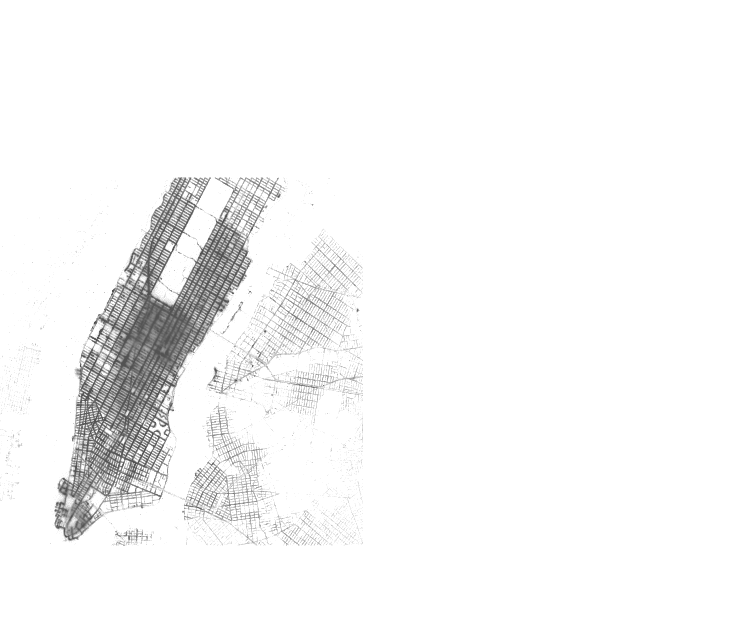

In [14]:
tf.shade(agg, cmap=Greys9_r, how='eq_hist')

The histogram is now fully flat (apart from the spacing of bins caused by the discrete nature of integer counting). Effectively, the visualization now shows a rank-order or percentile distribution of the data.  I.e., pixels are now colored according to where their corresponding counts fall in the distribution of all counts, with one end of the color range for the lowest counts, one end for the highest ones, and every colormap step in between having similar numbers of counts.  Such a visualization preserves the ordering between count values, faithfully displaying local differences in these counts, but discards absolute magnitudes (as the top 1% of the color range will be used for the top 1% of the data values, whatever those may be).

Now that the data is visible at every level, we can immediately see that there are some clear problems with the quality of the data -- there is a surprising number of trips that claim to drop off in the water or in the roadless areas of Central park, as well as in the middle of most of the tallest buildings in central Manhattan. These locations are likely to be GPS errors being made visible, perhaps partly because of poor GPS performance in between the tallest buildings.

Histogram equalization does not require any magic parameters, and in theory it should convey the maximum information available about the relative values between pixels, by mapping each of the observed ranges of values into visibly discriminable colors.  And it's clearly a good start in practice, because it shows both low values (avoiding undersaturation) and relatively high values clearly, without arbitrary settings.  

Even so, the results will depend on the nonlinearities of your visual system, your specific display device, and any automatic compensation or calibration being applied to your display device.  Thus in practice, the resulting range of colors may not map directly into a linearly perceivable range for your particular setup, and so you may want to further adjust the values to more accurately reflect the underlying structure, by adding additional calibration or compensation steps.

Moreover, at this point you can now bring in your human-centered goals for the visualization -- once the overall structure has been clearly revealed, you can select specific aspects of the data to highlight or bring out, based on your own questions about the data.  These questions can be expressed at whatever level of the pipeline is most appropriate, as shown in the examples below.  For instance, histogram equalization was done on the counts in the aggregate array, because if we waited until the image had been created, we would have been working with data truncated to the 256 color levels available per channel in most display devices, greatly reducing precision.  Or you may want to focus specifically on the highest peaks (as shown below), which again should be done at the aggregate level so that you can use the full color range of your display device to represent the narrow range of data that you are interested in.  Throughout, the goal is to map from the data of interest into the visible, clearly perceptible range available on your display device.


### 10-million-point datashaded plots: interactive

Although the above plots reveal the entire dataset at once, the full power of datashading requires an interactive plot, because a big dataset will usually have structure at very many different levels (such as different geographic regions).  Datashading allows auto-ranging and other automatic operations to be recomputed dynamically for the specific selected viewport, automatically revealing local structure that may not be visible from a global view.  Here we'll embed the generated images into a Bokeh plot to support fully interactive zooming.  For the highest detail on large monitors, you should increase the plot width and height above.

In [15]:
import holoviews.operation.datashader as hd
from datashader.colors import Hot
shaded = hd.datashade(hv.Points(df, ['dropoff_x', 'dropoff_y']), cmap=Hot, aggregator=ds.count('passenger_count'))
hd.dynspread(shaded, threshold=0.5, max_px=4).opts(bgcolor='black', xaxis=None, yaxis=None)

:DynamicMap   []
   :RGB   [dropoff_x,dropoff_y]   (R,G,B,A)

You can now zoom in interactively to this plot, seeing all the points available in that viewport, without ever needing to change the plot parameters for that specific zoom level.  Each time you zoom or pan, a new image is rendered (which takes a few seconds for large datasets), and displayed overlaid any other plot elements, providing full access to all of your data. Here we've used the optional `tf.dynspread` function to automatically enlarge the size of each datapoint once you've zoomed in so far that datapoints no longer have nearby neighbors.

### Customizing datashader

One of the most important features of datashading is that each of the stages of the datashader pipeline can be modified or replaced, either for personal preferences or to highlight specific aspects of the data.  Here we'll use a high-level `Pipeline` object that encapsulates the typical series of steps in the above `create_image` function, and then we'll customize it.  The default values of this pipeline are the same as the plot above, but here we'll add a special colormap to make the values stand out against an underlying map, and only plot hotspots (defined here as pixels (aggregation bins) that are in the 90th percentile by count): 

In [16]:
def transform(img):
    agg = img.data.Count
    return img.clone(agg.where(agg>np.percentile(agg,90)))

custom_points = hv.Points(df, ['dropoff_x', 'dropoff_y'])
custom_shaded = hd.shade(hd.rasterize(custom_points).apply(transform), cmap=Hot)
StamenTerrain() * hd.dynspread(custom_shaded, threshold=0.3, max_px=4)

:DynamicMap   []
   :Overlay
      .Tiles.I :Tiles   [x,y]
      .RGB.I   :RGB   [dropoff_x,dropoff_y]   (R,G,B,A)

If you zoom in to the plot above, you can see that the 90th-percentile criterion at first highlights the most active areas in the entire dataset, and then highlights the most active areas in each subsequent viewport.  Here yellow has been chosen to highlight the strongest peaks, and if you zoom in on one of those peaks you can see the most active areas in that particular geographic region, according to this dynamically evaluated definition of "most active". 

The above plots each followed a roughly standard series of steps useful for many datasets, but you can instead fully customize the computations involved.  This capability lets you do novel operations on the data once it has been aggregated into pixel-shaped bins.  For instance, you might want to plot all the pixels where there were more dropoffs than pickups in blue, and all those where there were more pickups than dropoffs in red.  To do this, just write your own transform function that can be applied to the rasterized (aggregated) pick up and drop off data to generate an interactive Bokeh plot:

In [17]:
def transform(overlay):
    picks = overlay.get(0).redim(pickup_x='x', pickup_y='y')
    drops = overlay.get(1).redim(dropoff_x='x', dropoff_y='y')
    pick_agg = picks.data.Count.data
    drop_agg = drops.data.Count.data
    more_picks = picks.clone(picks.data.where(pick_agg>drop_agg))
    more_drops = drops.clone(drops.data.where(drop_agg>pick_agg))
    return (hd.shade(more_drops, cmap=['lightcyan', "blue"]) *
            hd.shade(more_picks, cmap=['mistyrose', "red"]))

picks = hv.Points(df, ['pickup_x',  'pickup_y'])
drops = hv.Points(df, ['dropoff_x', 'dropoff_y'])
((hd.rasterize(picks) * hd.rasterize(drops))).apply(transform)

:DynamicMap   []
   :Overlay
      .RGB.I  :RGB   [x,y]   (R,G,B,A)
      .RGB.II :RGB   [x,y]   (R,G,B,A)

Now you can see that pickups are more common on major roads, as you'd expect, and dropoffs are more common on side streets.  In Manhattan, roads running along the island are more common for pickups. If you zoom in to any location, the data will be re-aggregated to the new resolution automatically, again calculating for each newly defined pixel whether pickups or dropoffs were more likely in that pixel. The interactive features of Bokeh are now fully usable with this large dataset, allowing you to uncover new structure at every level. 

We can also use other columns in the dataset as additional dimensions in the plot.  For instance, if we want to see if certain areas are more likely to have pickups at certain hours (e.g. areas with bars and restaurants might have pickups in the evening, while apartment buildings may have pickups in the morning).  One way to do this is to use the hour of the day as a category, and then colorize each hour:

In [18]:
df['hour'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.hour.astype('category')

In [19]:
colors = ["#FF0000","#FF3F00","#FF7F00","#FFBF00","#FFFF00","#BFFF00","#7FFF00","#3FFF00",
          "#00FF00","#00FF3F","#00FF7F","#00FFBF","#00FFFF","#00BFFF","#007FFF","#003FFF",
          "#0000FF","#3F00FF","#7F00FF","#BF00FF","#FF00FF","#FF00BF","#FF007F","#FF003F"]

In [20]:
pickups = hv.Points(df, ['pickup_x', 'pickup_y'])
hd.dynspread(hd.datashade(pickups, aggregator=ds.count_cat('hour'), color_key=colors), threshold=0.3, max_px=4)

:DynamicMap   []
   :RGB   [pickup_x,pickup_y]   (R,G,B,A)

In [21]:
pickups = hv.Points(df, ['dropoff_x', 'dropoff_y'])
hd.dynspread(hd.datashade(pickups, aggregator=ds.count_cat('hour'), color_key=colors), threshold=0.3, max_px=4)

:DynamicMap   []
   :RGB   [dropoff_x,dropoff_y]   (R,G,B,A)

Here the order of colors is roughly red (midnight), yellow (4am), green (8am), cyan (noon), blue (4pm), purple (8pm), and back to red (since hours and colors are both cyclic). There are clearly hotspots by hour that can now be investigated, and perhaps compared with the underlying map data.  And you can try first filtering the dataframe to only have weekdays or weekends, or only during certain public events, etc., or filtering the resulting pixels to have only those in a certain range of interest.  The system is very flexible, and it should be straightforward to express a very large range of possible queries and visualizations with very little code.

The above examples each used pre-existing components provided for the datashader pipeline, but you can implement any components you like and substitute them, allowing you to easily explore and highlight specific aspects of your data. Have fun datashading!